In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from platform import python_version

In [2]:
from scipy import stats

In [80]:
print(python_version())

3.11.1


# Data

In [3]:
td = pd.read_csv('TD.csv')

In [4]:
td

,Project,SonarQube_debt,Codiga_debt,CodeClimate_debt
0,ant-1.8,1431.033333,677.56,5595.5
1,antlr-3,934.400000,737.00,5701.4
2,aoi-2.8,1606.300000,702.66,10842.6
3,argouml,2277.266667,992.36,11998.6
4,aspectj,6653.583333,3144.50,67848.8
...,...,...,...,...
104,webmail,106.066667,48.60,209.7
105,weka-3-,24019.166670,1580.20,21832.0
106,xalan-2,2043.733333,1046.26,13372.4
107,xerces-,1532.333333,916.50,11602.9


In [5]:
sq_td = td['SonarQube_debt']

In [6]:
co_td = td['Codiga_debt']

In [7]:
cc_td = td['CodeClimate_debt']

## SonarQube vs Codiga

In [8]:
sq_co_per_co = stats.pearsonr(sq_td,co_td)
sq_co_per_co

PearsonRResult(statistic=0.19725817220940647, pvalue=0.03978831834883797)

In [9]:
sq_co_ken_co = stats.kendalltau(sq_td, co_td)
sq_co_ken_co

SignificanceResult(statistic=0.4371761123583426, pvalue=1.6111445451550733e-11)

In [10]:
sq_co_spe_co = stats.spearmanr(sq_td, co_td)
sq_co_spe_co

SignificanceResult(statistic=0.5616035622375424, pvalue=2.1108822006821138e-10)

In [11]:
sq_co_ks2 = stats.ks_2samp(sq_td, co_td)
sq_co_ks2

KstestResult(statistic=0.44036697247706424, pvalue=7.003146055137636e-10, statistic_location=780.86, statistic_sign=-1)

In [12]:
sq_co_tt = stats.ttest_ind(sq_td, co_td)
sq_co_tt

Ttest_indResult(statistic=4.325544491825122, pvalue=2.3248805146685487e-05)

## SonarQube vs CodeClimate

In [13]:
sq_cc_per_co = stats.pearsonr(sq_td,cc_td)
sq_cc_per_co

PearsonRResult(statistic=0.1066053476979371, pvalue=0.26989323370019613)

In [14]:
sq_cc_ken_co = stats.kendalltau(sq_td, cc_td)
sq_cc_ken_co

SignificanceResult(statistic=0.4091063540604825, pvalue=2.873822587971838e-10)

In [15]:
sq_cc_spe_co = stats.spearmanr(sq_td, cc_td)
sq_cc_spe_co

SignificanceResult(statistic=0.5362338986192197, pvalue=1.8619543909417223e-09)

In [16]:
sq_cc_ks2 = stats.ks_2samp(sq_td, cc_td)
sq_cc_ks2

KstestResult(statistic=0.27522935779816515, pvalue=0.00048468572223467126, statistic_location=1606.3, statistic_sign=1)

In [17]:
sq_cc_tt = stats.ttest_ind(sq_td, cc_td)
sq_cc_tt

Ttest_indResult(statistic=-1.8703087071615254, pvalue=0.06279358096871292)

## CodeClimate vs Codiga

In [18]:
cc_co_per_co = stats.pearsonr(cc_td,co_td)
cc_co_per_co

PearsonRResult(statistic=0.932679369558844, pvalue=3.3992598625241803e-49)

In [19]:
cc_co_ken_co = stats.kendalltau(cc_td, co_td)
cc_co_ken_co

SignificanceResult(statistic=0.7504884913668088, pvalue=6.118974970765523e-31)

In [20]:
cc_co_spe_co = stats.spearmanr(cc_td, co_td)
cc_co_spe_co

SignificanceResult(statistic=0.8972636856285909, pvalue=8.697983488292328e-40)

In [21]:
cc_co_ks2 = stats.ks_2samp(cc_td, co_td)
cc_co_ks2

KstestResult(statistic=0.6146788990825688, pvalue=1.4995090105333077e-19, statistic_location=1064.7, statistic_sign=-1)

In [22]:
cc_co_tt = stats.ttest_ind(cc_td, co_td)
cc_co_tt

Ttest_indResult(statistic=2.610510021577265, pvalue=0.009673811667039962)

In [23]:
compare = ['SonarQube vs Codiga','SonarQube vs CodeClimate','CodeClimate vs Codiga']
pearson_co = [sq_co_per_co[0],sq_cc_per_co[0],cc_co_per_co[0]]
pearson_p = [sq_co_per_co[1],sq_cc_per_co[1],cc_co_per_co[1]]
ken_co = [sq_co_ken_co[0],sq_cc_ken_co[0],cc_co_ken_co[0]]
ken_p = [sq_co_ken_co[1],sq_cc_ken_co[1],cc_co_ken_co[1]]
spear_co = [sq_co_spe_co[0],sq_cc_spe_co[0],cc_co_spe_co[0]]
spear_p = [sq_co_spe_co[1],sq_cc_spe_co[1],cc_co_spe_co[1]]
ks2_res = [sq_co_ks2[0],sq_cc_ks2[0],cc_co_ks2[0]]
ks2_p = [sq_co_ks2[1],sq_cc_ks2[1],cc_co_ks2[1]]
tt_res = [sq_co_tt[0],sq_cc_tt[0],cc_co_tt[0]]
tt_p = [sq_co_tt[1],sq_cc_tt[1],cc_co_tt[1]]

In [24]:
df = pd.DataFrame({'tools':compare, 'pearson_coefficient':pearson_co, 'pearson p-value':pearson_p,'kendall coefficient':ken_co, 'kendall p-value':ken_p,
                  'spearman coefficient':spear_co, 'spearman p-value':spear_p,'ks2 distance':ks2_res, 'ks2 p-value':ks2_p,
                  't_test distance':tt_res, 't_test p-value':tt_p})

In [25]:
df

,tools,pearson_coefficient,pearson p-value,kendall coefficient,kendall p-value,spearman coefficient,spearman p-value,ks2 distance,ks2 p-value,t_test distance,t_test p-value
0,SonarQube vs Codiga,0.197258,3.978832e-02,0.437176,1.611145e-11,0.561604,2.110882e-10,0.440367,7.003146e-10,4.325544,0.000023
1,SonarQube vs CodeClimate,0.106605,2.698932e-01,0.409106,2.873823e-10,0.536234,1.861954e-09,0.275229,4.846857e-04,-1.870309,0.062794
2,CodeClimate vs Codiga,0.932679,3.399260e-49,0.750488,6.118975e-31,0.897264,8.697983e-40,0.614679,1.499509e-19,2.610510,0.009674


In [26]:
df.to_csv('Stat_compare_TD.csv',index=False)

Text(0, 0.5, 'Probability Distribution')

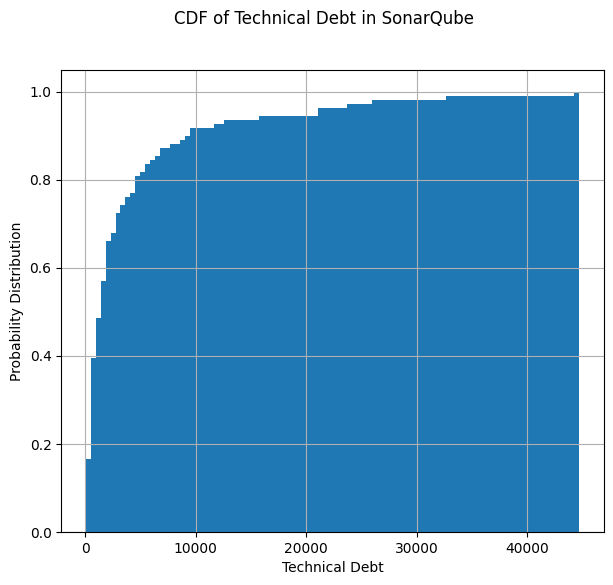

In [27]:
plt.figure(figsize=(7,6))
td['SonarQube_debt'].hist(cumulative=True, density=1, bins=100)
plt.suptitle('CDF of Technical Debt in SonarQube', fontsize=12, color='black')
plt.xlabel("Technical Debt")
plt.ylabel("Probability Distribution")

Text(0, 0.5, 'Probability Distribution')

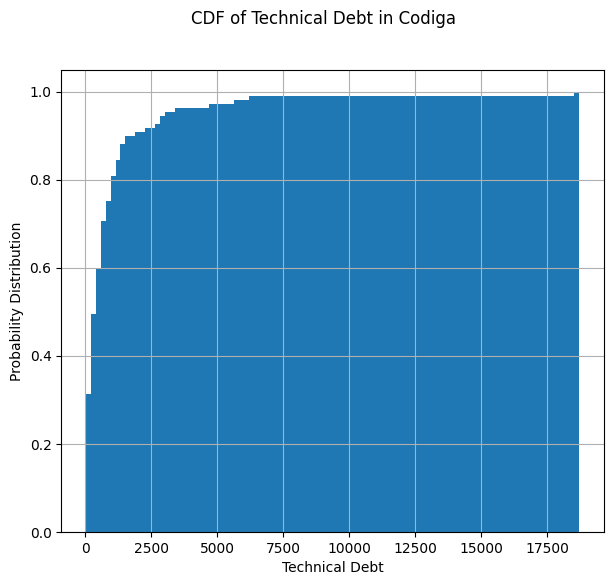

In [28]:
plt.figure(figsize=(7,6))
td['Codiga_debt'].hist(cumulative=True, density=1, bins=100)
plt.suptitle('CDF of Technical Debt in Codiga', fontsize=12, color='black')
plt.xlabel("Technical Debt")
plt.ylabel("Probability Distribution")

Text(0, 0.5, 'Probability Distribution')

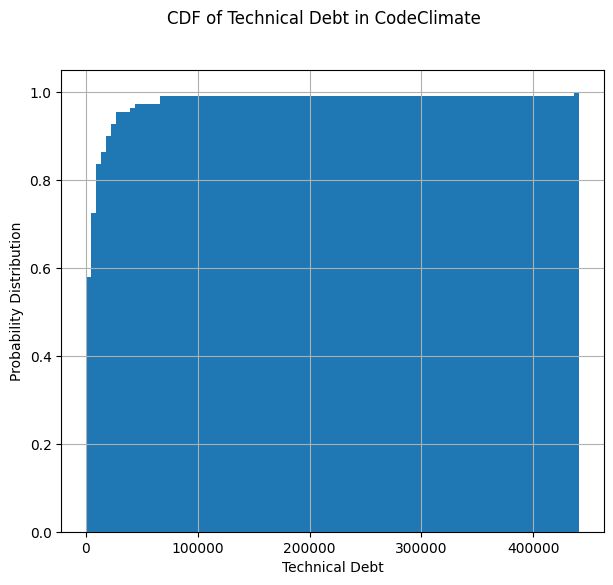

In [29]:
plt.figure(figsize=(7,6))
td['CodeClimate_debt'].hist(cumulative=True, density=1, bins=100)
plt.suptitle('CDF of Technical Debt in CodeClimate', fontsize=12, color='black')
plt.xlabel("Technical Debt")
plt.ylabel("Probability Distribution")

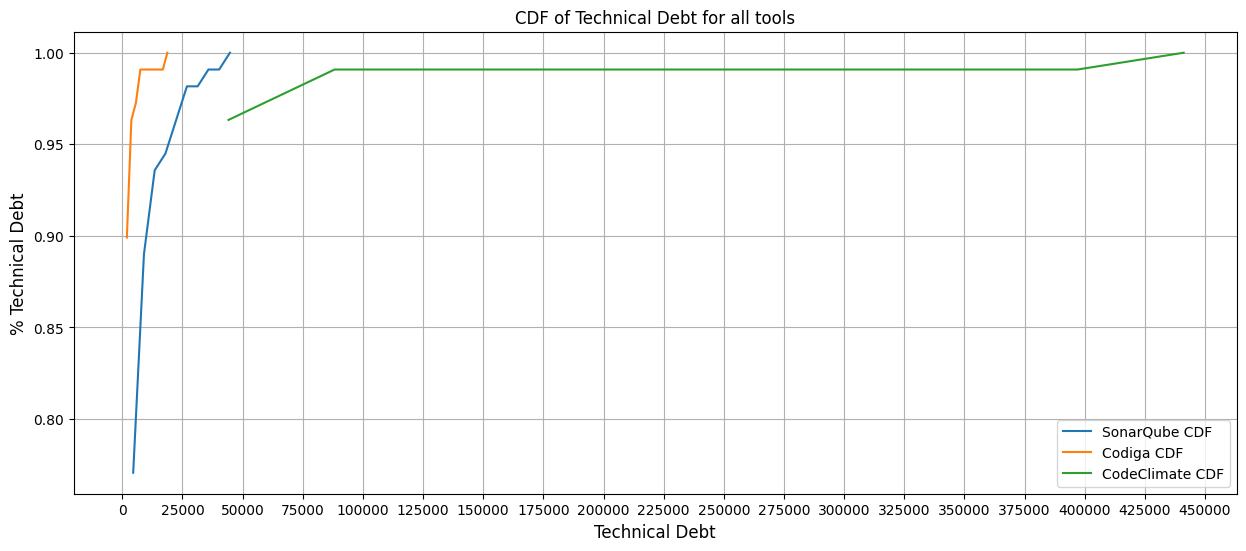

In [78]:
count, bins_count = np.histogram(td['SonarQube_debt'], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

co_count, co_bins_count = np.histogram(td['Codiga_debt'], bins=10)
co_pdf = co_count / sum(co_count)
co_cdf = np.cumsum(co_pdf)

cc_count, cc_bins_count = np.histogram(td['CodeClimate_debt'], bins=10)
cc_pdf = cc_count / sum(cc_count)
cc_cdf = np.cumsum(cc_pdf)
plt.figure(figsize=(15,6))
plt.title('CDF of Technical Debt for all tools', fontsize=12, color='black')
plt.plot(bins_count[1:], cdf, label="SonarQube CDF")
plt.plot(co_bins_count[1:], co_cdf, label="Codiga CDF")
plt.plot(cc_bins_count[1:], cc_cdf, label="CodeClimate CDF")
plt.xlabel("Technical Debt",fontsize=12)
plt.ylabel("% Technical Debt",fontsize=12)
plt.legend()
plt.xticks(np.arange(0, 470000, 25000))
plt.grid()
plt.savefig('CDF_plot.png')
plt.show()
